In [11]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

kauf = pd.read_csv('../dta/kauf.csv')
kauf = kauf[kauf['typ'] == 'Wohnung']
kauf = kauf[(kauf.fläche < 200) & (kauf.fläche > 10)]
kauf['preis_qm'] = kauf.preis / kauf.fläche
kauf['flächenkat'] = kauf.fläche.apply(lambda x: 5*round(x/5))

miete = pd.read_csv('../dta/miete.csv')
miete = miete[miete['typ'] == 'Wohnung']
miete = miete[(miete.fläche < 200) & (miete.fläche > 10)]
miete['miete_qm'] = miete.miete / miete.fläche
miete['flächenkat'] = miete.fläche.apply(lambda x: 5*round(x/5))
miete.columns

Index(['typ', 'kreis', 'miete', 'fläche', 'zimmer', 'miete_qm', 'flächenkat'], dtype='object')

In [38]:
many_cities = "Leipzig Berlin Chemnitz Dresden Düsseldorf Hamburg Köln".split()
few_cities = "Leipzig Berlin Chemnitz Hamburg".split()
miete.kreis.value_counts()

Leipzig                   5368
Berlin                    4836
Chemnitz                  3247
Dresden                   2391
Essen                     1950
Duisburg                  1931
Düsseldorf                1620
Hamburg                   1606
Recklinghausen (Kreis)    1514
Gelsenkirchen             1347
Frankfurt am Main         1294
Halle (Saale)             1205
Dortmund                  1192
Köln                      1152
Wuppertal                 1110
...
Lüchow-Dannenberg (Kreis)          16
Emmendingen (Kreis)                15
Schwabach                          15
Eichstätt (Kreis)                  14
Schweinfurt (Kreis)                14
Landau in der Pfalz                14
Memmingen                          12
Vechta (Kreis)                     12
Neustadt a.d. Waldnaab (Kreis)     11
Weißenburg-Gunzenhausen (Kreis)     9
Sankt Wendel (Kreis)                9
Dingolfing-Landau (Kreis)           9
Dillingen an der Donau (Kreis)      8
Unbekannt                           5

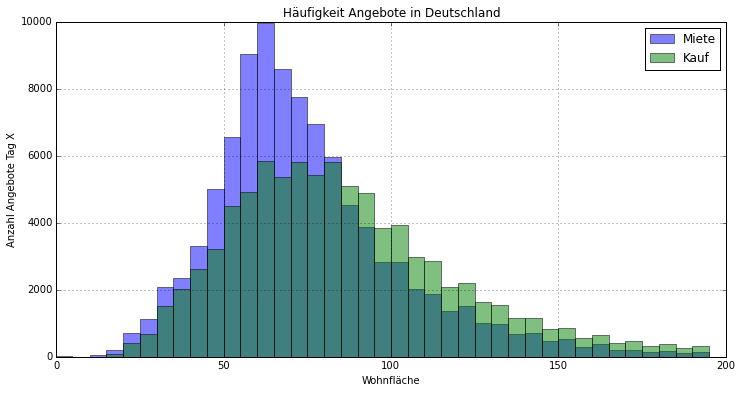

In [20]:
plt.figure(figsize=(12, 6))
miete.fläche.hist(bins=np.arange(0, 200, 5), alpha = 0.5, label="Miete")
kauf.fläche.hist(bins=np.arange(0, 200, 5), alpha = 0.5, label="Kauf")
plt.ylabel("Anzahl Angebote Tag X")
plt.xlabel("Wohnfläche")
plt.title('Häufigkeit Angebote in Deutschland')
plt.legend()

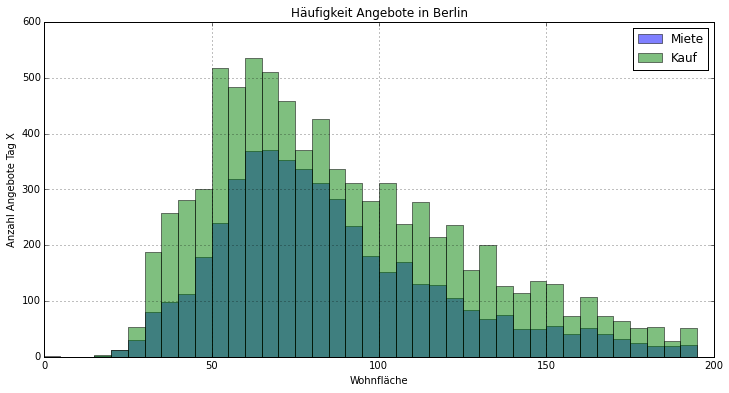

In [21]:
plt.figure(figsize=(12, 6))
miete[miete.kreis=='Berlin'].fläche.hist(bins=np.arange(0, 200, 5), alpha = 0.5, label="Miete")
kauf[kauf.kreis=='Berlin'].fläche.hist(bins=np.arange(0, 200, 5), alpha = 0.5, label="Kauf")
plt.ylabel("Anzahl Angebote Tag X")
plt.xlabel("Wohnfläche")
plt.title('Häufigkeit Angebote in Berlin')
plt.legend()

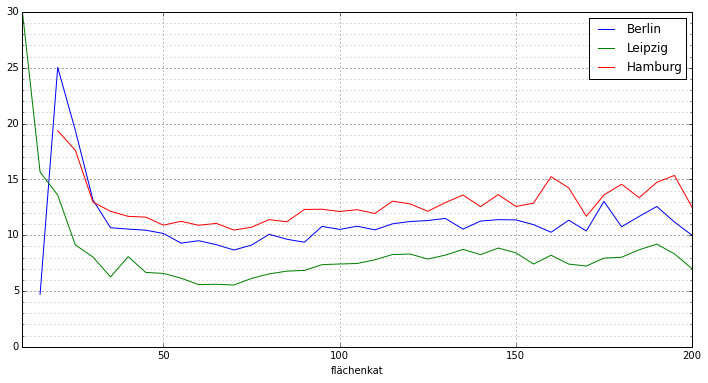

In [99]:
f, ax = plt.subplots(1, figsize=(12, 6))
berlin = whg[whg.kreis=='Berlin']
hamburg = whg[whg.kreis=='Hamburg']
leipzig = whg[whg.kreis=='Leipzig']
berlin[berlin.fläche > 10].groupby(berlin.flächenkat).miete_qm.mean().plot(label='Berlin')
leipzig[leipzig.fläche > 10].groupby(leipzig.flächenkat).miete_qm.mean().plot(label='Leipzig')
hamburg[hamburg.fläche > 10].groupby(hamburg.flächenkat).miete_qm.mean().plot(label='Hamburg')
ax.set_ylim(ymin=0)
ax.legend()
ax.xaxis.grid
ax.set_yticks(np.arange(0, 30, 1), minor=True)                                           
ax.grid(which='minor', alpha=0.5)                                                
plt.xlabel("Wohnfläche")
plt.ylabel("Miete pro qm")
plt.show(f)

In [105]:
whg.zimmer.value_counts()

3.00     35413
2.00     30703
4.00     10875
1.00      7964
3.50      3800
2.50      3512
5.00      1975
1.50      1059
4.50       817
6.00       368
5.50       117
7.00        71
2.20        28
6.50        19
8.00        12
2.10         8
3.10         2
20.00        2
1.25         2
9.00         2
2.30         2
1.20         2
3.20         2
12.00        1
15.00        1
9.50         1
10.00        1
7.50         1
3.40         1
0.00         1
dtype: int64

NameError: name 'whg' is not defined

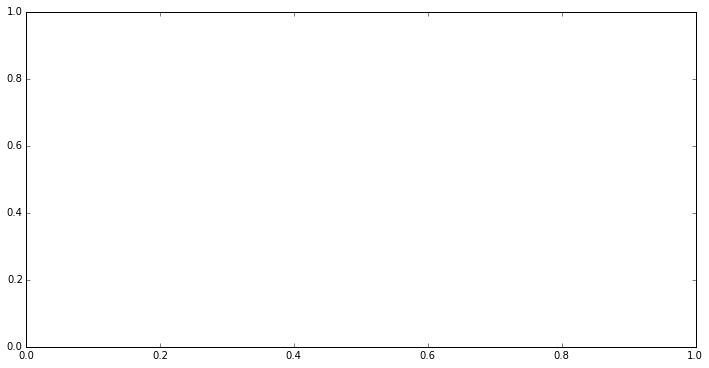

In [4]:
f, ax = plt.subplots(1, figsize=(12, 6))
w10 = whg[whg.fläche > 10]
w10[w10.zimmer < 2].groupby(w10.flächenkat).miete_qm.count().plot(label='Ein Zimmer')
w10[(w10.zimmer >= 2) & (w10.zimmer < 3)].groupby(w10.flächenkat).miete_qm.count().plot(label='Zwei Zimmer')
w10[(w10.zimmer >= 3) & (w10.zimmer < 4)].groupby(w10.flächenkat).miete_qm.count().plot(label='Drei Zimmer')
w10[(w10.zimmer >= 4)].groupby(w10.flächenkat).miete_qm.count().plot(label='Vier und mehr Zimmer')

ax.legend()
plt.ylabel("Anzahl Angebote in Deutschland Tag X")
plt.xlabel("Wohnfläche")
ax.set_xticks(np.arange(0, 200, 10), minor=True)                                           
ax.grid(which='minor', alpha=0.5)                                                


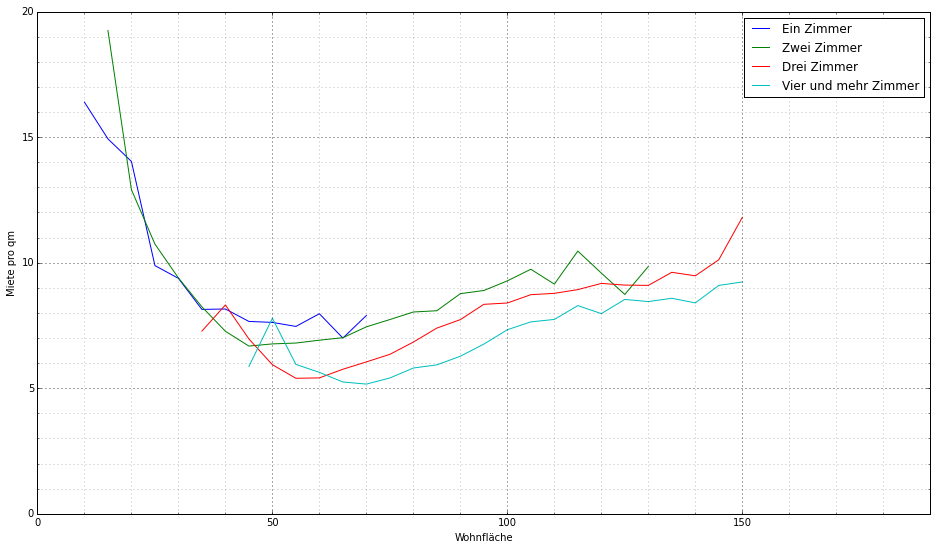

In [145]:
f, ax = plt.subplots(1, figsize=(16, 9))
w10 = whg[(whg.miete_qm < 30) & (whg.fläche > 10) & (whg.fläche < 150) & (whg.miete > 10)]
w10[(w10.zimmer <  2) &                    (w10.fläche < 70 )].groupby(w10.flächenkat).miete_qm.mean().plot(label='Ein Zimmer')
w10[(w10.zimmer >= 2) & (w10.zimmer < 3) & (w10.fläche < 130)].groupby(w10.flächenkat).miete_qm.mean().plot(label='Zwei Zimmer')
w10[(w10.zimmer >= 3) & (w10.zimmer < 4) & (w10.fläche > 30 )].groupby(w10.flächenkat).miete_qm.mean().plot(label='Drei Zimmer')
w10[(w10.zimmer >= 4) &                    (w10.fläche > 30 )].groupby(w10.flächenkat).miete_qm.mean().plot(label='Vier und mehr Zimmer')

ax.legend()
ax.set_yticks(np.arange(0, 20, 1), minor=True)                                           
ax.set_xticks(np.arange(0, 200, 10), minor=True)  
plt.xlabel("Wohnfläche")
plt.ylabel("Miete pro qm")
ax.grid(which='minor', alpha=0.5)               

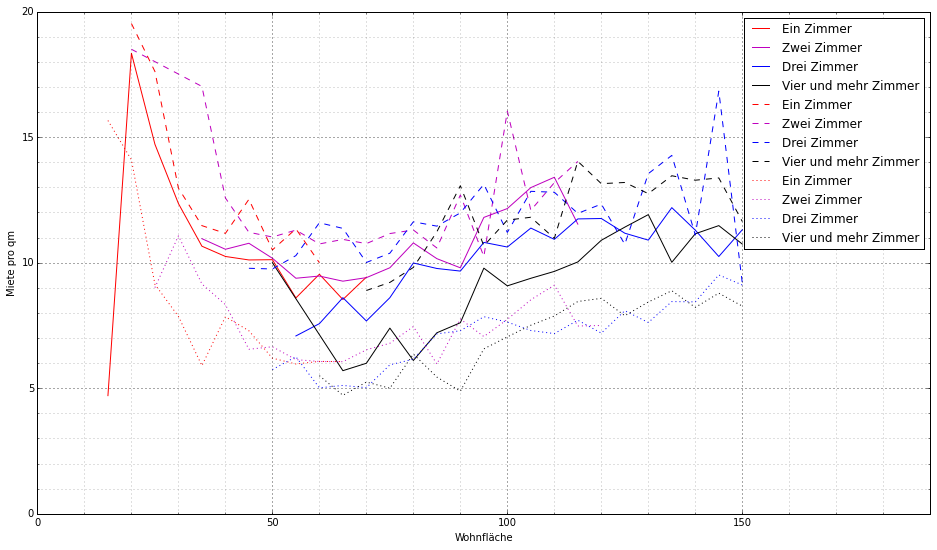

In [149]:
def plot_mean_rent_over_area(df, lbl, style):
    df.groupby(df.flächenkat).miete_qm.mean().plot(label=lbl, style=style)

def plot_by_no_rooms(df, line_style='-'):
    plot_mean_rent_over_area(df[(df.zimmer <  2) &                    (df.fläche <  70)], 'Ein Zimmer', 'r'+line_style)
    plot_mean_rent_over_area(df[(df.zimmer >= 2) & (df.zimmer <  3) & (df.fläche < 120)], 'Zwei Zimmer', 'm'+line_style)
    plot_mean_rent_over_area(df[(df.zimmer >= 3) & (df.zimmer <  4) & (df.fläche >  30)], 'Drei Zimmer', 'b'+line_style)
    plot_mean_rent_over_area(df[(df.zimmer >= 4) &                    (df.fläche >  30)], 'Vier und mehr Zimmer', 'k'+line_style)

def format_rent_plot():
    ax.legend()
    ax.set_yticks(np.arange(0, 20, 1), minor=True)                                           
    ax.set_xticks(np.arange(0, 200, 10), minor=True)  
    plt.xlabel("Wohnfläche")
    plt.ylabel("Miete pro qm")
    ax.grid(which='minor', alpha=0.5)  

f, ax = plt.subplots(1, figsize=(16, 9))
w10 = whg[(whg.miete_qm < 30) & (whg.fläche > 10) & (whg.fläche < 150) & (whg.miete > 10)]
plot_by_no_rooms(w10[w10.kreis=='Berlin'], '-')
plot_by_no_rooms(w10[w10.kreis=='Hamburg'], '--')
plot_by_no_rooms(w10[w10.kreis=='Leipzig'], ':')
format_rent_plot():

In [42]:
1+1


2